In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as lng


In [2]:
### import donnees
dataframe1 = pd.read_csv(r"C:\Users\user\Documents\MVA\PGM\homework1_data\data\trainA", sep=" " , header=None)
dataframe2 = pd.read_csv(r"C:\Users\user\Documents\MVA\PGM\homework1_data\data\trainB", sep=" " , header=None)
dataframe3 = pd.read_csv(r"C:\Users\user\Documents\MVA\PGM\homework1_data\data\trainC", sep=" " , header=None)

dataframe_testA = pd.read_csv(r"C:\Users\user\Documents\MVA\PGM\homework1_data\data\testA", sep=" " , header=None)
dataframe_testB = pd.read_csv(r"C:\Users\user\Documents\MVA\PGM\homework1_data\data\testB", sep=" " , header=None)
dataframe_testC = pd.read_csv(r"C:\Users\user\Documents\MVA\PGM\homework1_data\data\testC", sep=" " , header=None)

dataframe1.head()

,0,1,2
0,12.138367,6.455699,1
1,10.622594,11.083096,0
2,11.777052,8.121582,1
3,10.960882,12.226554,0
4,11.296539,10.211002,0


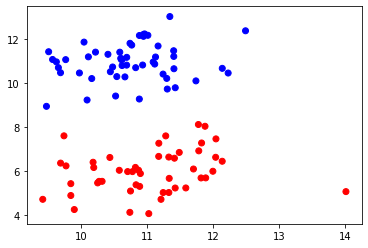

In [3]:
colormap = np.array(['blue', 'red'])
plt.scatter(dataframe1[0], dataframe1[1], c = colormap[dataframe1[2]])

In [4]:
X = dataframe1.loc[:,0:1]
Y = dataframe1.loc[:, 2]

X.head()

,0,1
0,12.138367,6.455699
1,10.622594,11.083096
2,11.777052,8.121582
3,10.960882,12.226554
4,11.296539,10.211002


## Partie "Generative Model"

In [5]:
X = np.array(X)
Y = np.array(Y)

print(X.shape)
print(Y.shape)

(100, 2)
(100,)


In [6]:
N = X.shape[0]

n1 = sum(Y)

theta = n1/N
print("theta : ", theta)

mu1 = np.array([[sum(Y*X[:,0]),sum(Y*X[:,1])]])/n1
print(mu1.shape)
print("mu1 : ", mu1)

n0 = N - n1
mu0 = np.array([[sum((1-Y)*X[:,0]),sum((1-Y)*X[:,1])]])/n0
print(mu0.shape)
print("mu0 : ", mu0)

sigma1 = np.zeros((X.shape[1],X.shape[1]))
for i in range(N):
    sigma1 += Y[i]*(X[i]-mu1).T@(X[i]-mu1)
sigma1 *= 1/n1
print(sigma1.shape)
print("sigma1 : ", sigma1)

sigma0 = np.zeros((X.shape[1],X.shape[1]))
for i in range(N):
    sigma0 += (1-Y[i])*(X[i]-mu0).T@(X[i]-mu0)
sigma0 *= 1/n0
print(sigma0.shape)
print("sigma0 : ", sigma0)

sigma = (n1/N)*sigma1 + (n0/N)*sigma0
print(sigma.shape)
print("sigma : ", sigma)

theta :  0.48
(1, 2)
mu1 :  [[11.03264581  5.99294053]]
(1, 2)
mu0 :  [[10.73248858 10.93983367]]
(2, 2)
sigma1 :  [[0.7220896  0.18267769]
 [0.18267769 0.93481714]]
(2, 2)
sigma0 :  [[0.46464757 0.0989291 ]
 [0.0989291  0.71324415]]
(2, 2)
sigma :  [[0.58821974 0.13912842]
 [0.13912842 0.81959919]]


In [7]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def prob_lda(x, beta, gamma):
    return sigmoid(x@beta.T + gamma)

beta = (mu1 - mu0)@lng.inv(sigma)
print(beta.shape)
print("beta : ", beta)

gamma = (1/2)*(mu1 - mu0)@lng.inv(sigma)@(mu1 - mu0).T + np.log(theta/(1-theta))
print("gamma : ", gamma)

(1, 2)
beta :  [[ 2.01894473 -6.37846623]]
gamma :  [[15.99975312]]


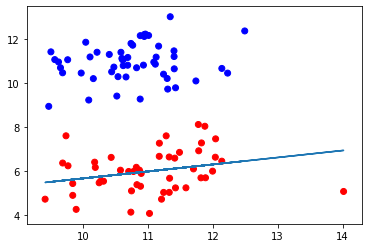

In [8]:
def hyperplan_lda(x, beta, gamma):
    y = -(beta[0,0]*x+gamma)/beta[0,1]
    return y.reshape(len(x))

plt.plot(X[:, 0], hyperplan_lda(X[:,0], beta, gamma))
plt.scatter(X[:,0], X[:,1], c = colormap[Y])

In [9]:
def train_lda(dataframe):
    X = dataframe.loc[:,0:1]
    Y = dataframe.loc[:, 2]
    X = np.array(X)
    Y = np.array(Y)
    N = X.shape[0]
    n1 = sum(Y)
    n0 = N - n1
    theta = n1/N
    mu1 = np.array([[sum(Y*X[:,0]),sum(Y*X[:,1])]])/n1
    mu0 = np.array([[sum((1-Y)*X[:,0]),sum((1-Y)*X[:,1])]])/n0
    sigma1 = np.zeros((X.shape[1],X.shape[1]))
    for i in range(N):
        sigma1 += Y[i]*(X[i]-mu1).T@(X[i]-mu1)
    sigma1 *= 1/n1
    sigma0 = np.zeros((X.shape[1],X.shape[1]))
    for i in range(N):
        sigma0 += (1-Y[i])*(X[i]-mu0).T@(X[i]-mu0)
    sigma0 *= 1/n0
    sigma = (n1/N)*sigma1 + (n0/N)*sigma0
    beta = (mu1 - mu0)@lng.inv(sigma)
    gamma = (1/2)*(mu1 - mu0)@lng.inv(sigma)@(mu1 - mu0).T + np.log(theta/(1-theta))
    gamma = gamma[0,0]
    return theta, mu1, mu0, sigma, beta, gamma

def test_lda(dataframe, beta, gamma):
    X = dataframe.loc[:,0:1]
    Y = dataframe.loc[:, 2]
    X = np.array(X)
    Y = np.array(Y)
    N = X.shape[0]
    Y_prob = prob_lda(X, beta, gamma*np.ones((N,1)))
    Y_pred = []
    for i in range(N):
        if Y_prob[i] < 1/2:
            Y_pred.append(0)
        else:
            Y_pred.append(1)
    misclass = sum(Y!=Y_pred)/X.shape[0]
    return Y_pred, misclass

Paramètres appris sur le set de train A : 
theta_A :  0.48
mu1_A :  [[11.03264581  5.99294053]]
mu0_A :  [[10.73248858 10.93983367]]
sigma_A :  [[0.58821974 0.13912842]
 [0.13912842 0.81959919]]
beta_A :  [[ 2.01894473 -6.37846623]]
gamma_A :  15.999753118764525
Taux de mal classés pour le set de train A :  0.24


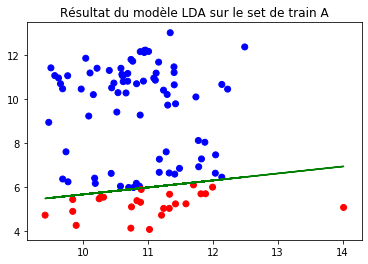

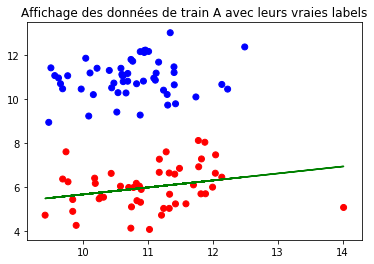

Taux de mal classés pour le set de test A :  0.22


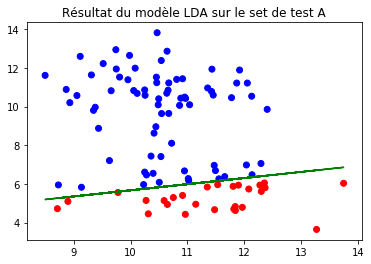

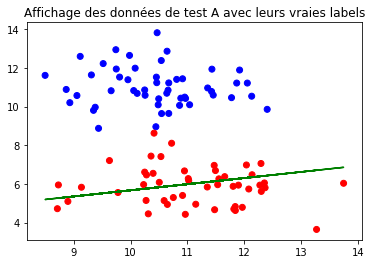

In [10]:
thetaA, mu1A, mu0A, sigmaA, betaA, gammaA = train_lda(dataframe1)

print("Paramètres appris sur le set de train A : ")
print("theta_A : ", thetaA)
print("mu1_A : ", mu1A)
print("mu0_A : ", mu0A)
print("sigma_A : ", sigmaA)
print("beta_A : ", betaA)
print("gamma_A : ", gammaA)

Y_pred_trainA, misclass_trainA = test_lda(dataframe1, betaA, gammaA)

Y_pred_testA, misclass_testA = test_lda(dataframe_testA, betaA, gammaA)

print("Taux de mal classés pour le set de train A : ", misclass_trainA)

plt.plot(X[:, 0], hyperplan_lda(X[:,0], betaA, gammaA), "g")
plt.scatter(X[:,0], X[:,1], c = colormap[Y_pred_trainA])
plt.title("Résultat du modèle LDA sur le set de train A")
plt.show()

plt.plot(X[:, 0], hyperplan_lda(X[:,0], betaA, gammaA), "g")
plt.scatter(X[:,0], X[:,1], c = colormap[Y])
plt.title("Affichage des données de train A avec leurs vraies labels")
plt.show()

print("Taux de mal classés pour le set de test A : ", misclass_testA)

plt.plot(dataframe_testA[0], hyperplan_lda(np.array(dataframe_testA[0]), betaA, gammaA), "g")
plt.scatter(dataframe_testA[0], dataframe_testA[1], c = colormap[Y_pred_testA])
plt.title("Résultat du modèle LDA sur le set de test A")
plt.show()

plt.plot(dataframe_testA[0], hyperplan_lda(np.array(dataframe_testA[0]), betaA, gammaA), "g")
plt.scatter(dataframe_testA[0], dataframe_testA[1], c = colormap[dataframe_testA[2]])
plt.title("Affichage des données de test A avec leurs vraies labels")
plt.show()

Paramètres appris sur le set de train B : 
theta_B :  0.55
mu1_B :  [[11.24757662  6.095283  ]]
mu0_B :  [[10.58256756 11.17169818]]
sigma_B :  [[1.64391088 0.70139847]
 [0.70139847 2.0605845 ]]
beta_B :  [[ 1.7029769 -3.0432533]]
gamma_B :  8.491326857315418
Taux de mal classés pour le set de train B :  0.015


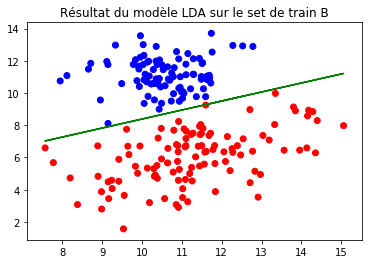

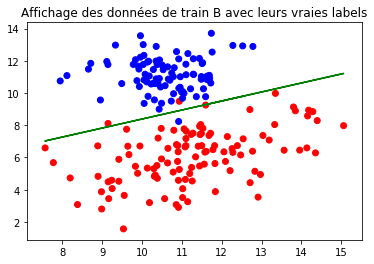

Taux de mal classés pour le set de test B :  0.035


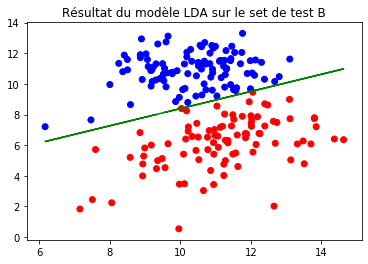

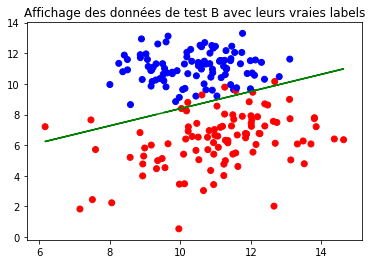

In [11]:
thetaB, mu1B, mu0B, sigmaB, betaB, gammaB = train_lda(dataframe2)

print("Paramètres appris sur le set de train B : ")
print("theta_B : ", thetaB)
print("mu1_B : ", mu1B)
print("mu0_B : ", mu0B)
print("sigma_B : ", sigmaB)
print("beta_B : ", betaB)
print("gamma_B : ", gammaB)

Y_pred_trainB, misclass_trainB = test_lda(dataframe2, betaB, gammaB)

Y_pred_testB, misclass_testB = test_lda(dataframe_testB, betaB, gammaB)

print("Taux de mal classés pour le set de train B : ", misclass_trainB)

plt.plot(dataframe2[0], hyperplan_lda(np.array(dataframe2[0]), betaB, gammaB), "g")
plt.scatter(dataframe2[0], dataframe2[1], c = colormap[Y_pred_trainB])
plt.title("Résultat du modèle LDA sur le set de train B")
plt.show()

plt.plot(dataframe2[0], hyperplan_lda(np.array(dataframe2[0]), betaB, gammaB), "g")
plt.scatter(dataframe2[0], dataframe2[1], c = colormap[dataframe2[2]])
plt.title("Affichage des données de train B avec leurs vraies labels")
plt.show()

print("Taux de mal classés pour le set de test B : ", misclass_testB)

plt.plot(dataframe_testB[0], hyperplan_lda(np.array(dataframe_testB[0]), betaB, gammaB), "g")
plt.scatter(dataframe_testB[0], dataframe_testB[1], c = colormap[Y_pred_testB])
plt.title("Résultat du modèle LDA sur le set de test B")
plt.show()

plt.plot(dataframe_testB[0], hyperplan_lda(np.array(dataframe_testB[0]), betaB, gammaB), "g")
plt.scatter(dataframe_testB[0], dataframe_testB[1], c = colormap[dataframe_testB[2]])
plt.title("Affichage des données de test B avec leurs vraies labels")
plt.show()

Paramètres appris sur le set de train C : 
theta_C :  0.4166666666666667
mu1_C :  [[11.18463199  6.04249315]]
mu0_C :  [[10.6192273  10.83868653]]
sigma_C :  [[ 1.27823018 -0.06243809]
 [-0.06243809  1.66584186]]
beta_C :  [[ 0.30224914 -2.86781214]]
gamma_C :  6.626265096307037
Taux de mal classés pour le set de train C :  0.41333333333333333


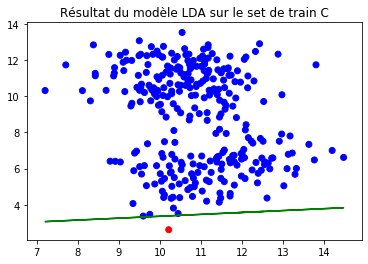

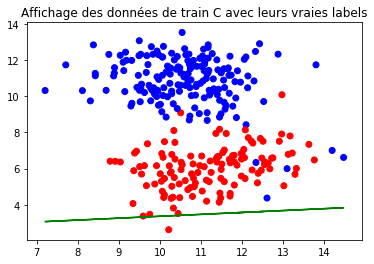

Taux de mal classés pour le set de test C :  0.46


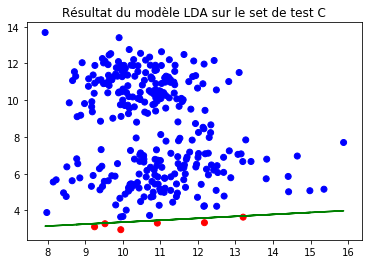

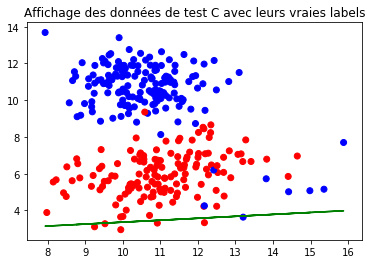

In [12]:
thetaC, mu1C, mu0C, sigmaC, betaC, gammaC = train_lda(dataframe3)

print("Paramètres appris sur le set de train C : ")
print("theta_C : ", thetaC)
print("mu1_C : ", mu1C)
print("mu0_C : ", mu0C)
print("sigma_C : ", sigmaC)
print("beta_C : ", betaC)
print("gamma_C : ", gammaC)

Y_pred_trainC, misclass_trainC = test_lda(dataframe3, betaC, gammaC)

Y_pred_testC, misclass_testC = test_lda(dataframe_testC, betaC, gammaC)

print("Taux de mal classés pour le set de train C : ", misclass_trainC)

plt.plot(dataframe3[0], hyperplan_lda(np.array(dataframe3[0]), betaC, gammaC), "g")
plt.scatter(dataframe3[0], dataframe3[1], c = colormap[Y_pred_trainC])
plt.title("Résultat du modèle LDA sur le set de train C")
plt.show()

plt.plot(dataframe3[0], hyperplan_lda(np.array(dataframe3[0]), betaC, gammaC), "g")
plt.scatter(dataframe3[0], dataframe3[1], c = colormap[dataframe3[2]])
plt.title("Affichage des données de train C avec leurs vraies labels")
plt.show()

print("Taux de mal classés pour le set de test C : ", misclass_testC)

plt.plot(dataframe_testC[0], hyperplan_lda(np.array(dataframe_testC[0]), betaC, gammaC), "g")
plt.scatter(dataframe_testC[0], dataframe_testC[1], c = colormap[Y_pred_testC])
plt.title("Résultat du modèle LDA sur le set de test C")
plt.show()

plt.plot(dataframe_testC[0], hyperplan_lda(np.array(dataframe_testC[0]), betaC, gammaC), "g")
plt.scatter(dataframe_testC[0], dataframe_testC[1], c = colormap[dataframe_testC[2]])
plt.title("Affichage des données de test C avec leurs vraies labels")
plt.show()

## QDA Model

In [13]:
def train_qda(dataframe):
    X = dataframe.loc[:,0:1]
    Y = dataframe.loc[:, 2]
    X = np.array(X)
    Y = np.array(Y)
    N = X.shape[0]
    n1 = sum(Y)
    n0 = N - n1
    theta = n1/N
    mu1 = np.array([[sum(Y*X[:,0]),sum(Y*X[:,1])]])/n1
    mu0 = np.array([[sum((1-Y)*X[:,0]),sum((1-Y)*X[:,1])]])/n0
    sigma1 = np.zeros((X.shape[1],X.shape[1]))
    for i in range(N):
        sigma1 += Y[i]*(X[i]-mu1).T@(X[i]-mu1)
    sigma1 *= 1/n1
    sigma0 = np.zeros((X.shape[1],X.shape[1]))
    for i in range(N):
        sigma0 += (1-Y[i])*(X[i]-mu0).T@(X[i]-mu0)
    sigma0 *= 1/n0
    Q = lng.inv(sigma0) - lng.inv(sigma1)
    beta = mu1@lng.inv(sigma1) - mu0@lng.inv(sigma0)
    gamma = (1/2)*mu0@lng.inv(sigma0)@mu0.T - (1/2)*mu1@lng.inv(sigma1)@mu1.T + np.log(theta/(1-theta)) + (1/2)*np.log(lng.det(sigma0)) + (1/2)*np.log(lng.det(sigma1))
    gamma = gamma[0,0]
    return theta, mu1, mu0, sigma1, sigma0, Q, beta, gamma

def prob_qda(x, Q, beta, gamma):
    return sigmoid((1/2)*x@Q@x.T + x@beta.T + gamma)

def test_qda(dataframe, Q, beta, gamma):
    X = dataframe.loc[:,0:1]
    Y = dataframe.loc[:, 2]
    X = np.array(X)
    Y = np.array(Y)
    N = X.shape[0]
    Y_prob = []
    for i in range(N):
        Y_prob.append(prob_qda(X[i], Q, beta, gamma))
    Y_pred = []
    for i in range(N):
        if Y_prob[i] < 1/2:
            Y_pred.append(0)
        else:
            Y_pred.append(1)
    misclass = sum(Y!=Y_pred)/X.shape[0]
    return Y_pred, misclass

In [14]:
def hyperplan_qda(dataframe, Q, beta, gamma):
    X = np.linspace(min(dataframe[0]), max(dataframe[0]), 1000)
    Y = np.linspace(min(dataframe[1]), max(dataframe[1]), 1000)
    XX = np.meshgrid(X, Y)
    Z = (1/2)*(Q[0,0]*XX[0]**2 + (Q[0,1] + Q[1,0])*XX[0]*XX[1] + Q[1,1]*XX[1]**2) + beta[0,0]*XX[0] + beta[0,1]*XX[1] + gamma
    return X, Y, Z
 

Paramètres appris sur le set de train A : 
theta_A :  0.48
mu1_A :  [[11.03264581  5.99294053]]
mu0_A :  [[10.73248858 10.93983367]]
sigma1_A :  [[0.7220896  0.18267769]
 [0.18267769 0.93481714]]
sigma0_A :  [[0.46464757 0.0989291 ]
 [0.0989291  0.71324415]]
Q_A :  [[ 0.76076536 -0.02289641]
 [-0.02289641  0.31934632]]
beta_A :  [[-6.06874663 -8.90036349]]
gamma_A :  87.13774783479253
Taux de mal classés pour le set de train A :  0.0


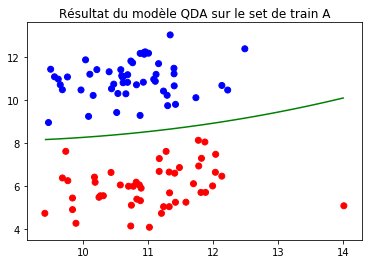

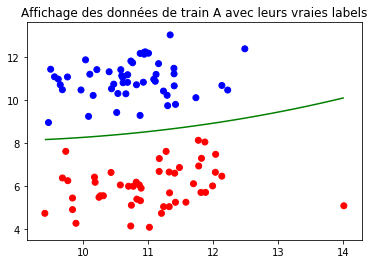

Taux de mal classés pour le set de test A :  0.01


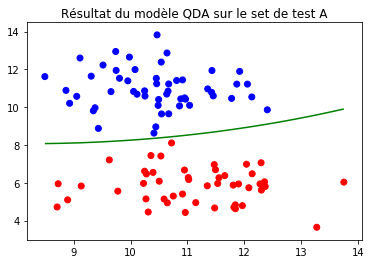

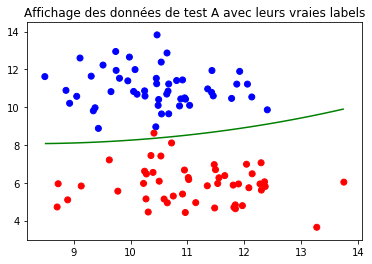

In [15]:
thetaA, mu1A, mu0A, sigma1A, sigma0A, QA, betaA, gammaA = train_qda(dataframe1)

print("Paramètres appris sur le set de train A : ")
print("theta_A : ", thetaA)
print("mu1_A : ", mu1A)
print("mu0_A : ", mu0A)
print("sigma1_A : ", sigma1A)
print("sigma0_A : ", sigma0A)
print("Q_A : ", QA)
print("beta_A : ", betaA)
print("gamma_A : ", gammaA)

Y_pred_trainA, misclass_trainA = test_qda(dataframe1, QA, betaA, gammaA)

Y_pred_testA, misclass_testA = test_qda(dataframe_testA, QA, betaA, gammaA)

print("Taux de mal classés pour le set de train A : ", misclass_trainA)

boundary_X_trainA, boundary_Y_trainA, hyperplan_trainA = hyperplan_qda(dataframe1, QA, betaA, gammaA)

plt.contour(boundary_X_trainA, boundary_Y_trainA, hyperplan_trainA, [0], colors ="g")
plt.scatter(X[:,0], X[:,1], c = colormap[Y_pred_trainA])
plt.title("Résultat du modèle QDA sur le set de train A")
plt.show()

plt.contour(boundary_X_trainA, boundary_Y_trainA, hyperplan_trainA, [0], colors ="g")
plt.scatter(X[:,0], X[:,1], c = colormap[Y])
plt.title("Affichage des données de train A avec leurs vraies labels")
plt.show()

print("Taux de mal classés pour le set de test A : ", misclass_testA)

boundary_X_testA, boundary_Y_testA, hyperplan_testA = hyperplan_qda(dataframe_testA, QA, betaA, gammaA)

plt.contour(boundary_X_testA, boundary_Y_testA, hyperplan_testA, [0], colors ="g")
plt.scatter(dataframe_testA[0], dataframe_testA[1], c = colormap[Y_pred_testA])
plt.title("Résultat du modèle QDA sur le set de test A")
plt.show()

plt.contour(boundary_X_testA, boundary_Y_testA, hyperplan_testA, [0], colors ="g")
plt.scatter(dataframe_testA[0], dataframe_testA[1], c = colormap[dataframe_testA[2]])
plt.title("Affichage des données de test A avec leurs vraies labels")
plt.show()

Paramètres appris sur le set de train B : 
theta_B :  0.55
mu1_B :  [[11.24757662  6.095283  ]]
mu0_B :  [[10.58256756 11.17169818]]
sigma1_B :  [[2.36576566 1.23147744]
 [1.23147744 2.84044647]]
sigma0_B :  [[0.76164392 0.05352417]
 [0.05352417 1.10741986]]
Q_B :  [[0.77153026 0.1729985 ]
 [0.1729985  0.45141048]]
beta_B :  [[-8.53298501 -9.33925741]]
gamma_B :  96.97221727225795
Taux de mal classés pour le set de train B :  0.015


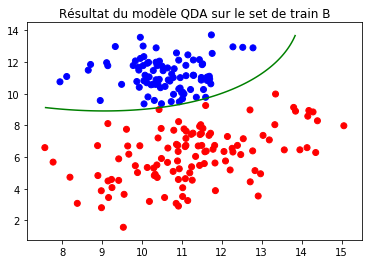

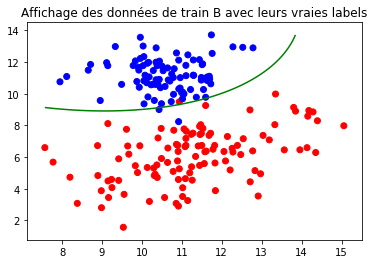

Taux de mal classés pour le set de test B :  0.045


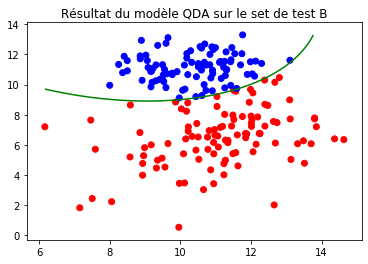

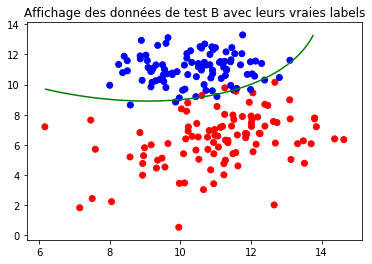

In [16]:
thetaB, mu1B, mu0B, sigma1B, sigma0B, QB, betaB, gammaB = train_qda(dataframe2)

print("Paramètres appris sur le set de train B : ")
print("theta_B : ", thetaB)
print("mu1_B : ", mu1B)
print("mu0_B : ", mu0B)
print("sigma1_B : ", sigma1B)
print("sigma0_B : ", sigma0B)
print("Q_B : ", QB)
print("beta_B : ", betaB)
print("gamma_B : ", gammaB)

Y_pred_trainB, misclass_trainB = test_qda(dataframe2, QB, betaB, gammaB)

Y_pred_testB, misclass_testB = test_qda(dataframe_testB, QB, betaB, gammaB)

print("Taux de mal classés pour le set de train B : ", misclass_trainB)

boundary_X_trainB, boundary_Y_trainB, hyperplan_trainB = hyperplan_qda(dataframe2, QB, betaB, gammaB)

plt.contour(boundary_X_trainB, boundary_Y_trainB, hyperplan_trainB, [0], colors ="g")
plt.scatter(dataframe2[0], dataframe2[1], c = colormap[Y_pred_trainB])
plt.title("Résultat du modèle QDA sur le set de train B")
plt.show()

plt.contour(boundary_X_trainB, boundary_Y_trainB, hyperplan_trainB, [0], colors ="g")
plt.scatter(dataframe2[0], dataframe2[1], c = colormap[dataframe2[2]])
plt.title("Affichage des données de train B avec leurs vraies labels")
plt.show()

print("Taux de mal classés pour le set de test B : ", misclass_testB)

boundary_X_testB, boundary_Y_testB, hyperplan_testB = hyperplan_qda(dataframe_testB, QB, betaB, gammaB)

plt.contour(boundary_X_testB, boundary_Y_testB, hyperplan_testB, [0], colors ="g")
plt.scatter(dataframe_testB[0], dataframe_testB[1], c = colormap[Y_pred_testB])
plt.title("Résultat du modèle QDA sur le set de test B")
plt.show()

plt.contour(boundary_X_testB, boundary_Y_testB, hyperplan_testB, [0], colors ="g")
plt.scatter(dataframe_testB[0], dataframe_testB[1], c = colormap[dataframe_testB[2]])
plt.title("Affichage des données de test B avec leurs vraies labels")
plt.show()

Paramètres appris sur le set de train C : 
theta_C :  0.4166666666666667
mu1_C :  [[11.18463199  6.04249315]]
mu0_C :  [[10.6192273  10.83868653]]
sigma1_C :  [[1.26768817 0.45714317]
 [0.45714317 1.44158652]]
sigma0_C :  [[ 1.28576019 -0.43356756]
 [-0.43356756  1.82602425]]
Q_C :  [[-0.04525076  0.48318807]
 [ 0.48318807 -0.18794657]]
beta_C :  [[-2.89831816 -7.01029496]]
gamma_C :  55.10948816955957
Taux de mal classés pour le set de train C :  0.02666666666666667


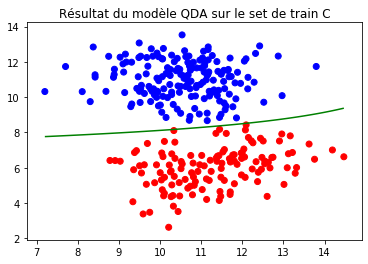

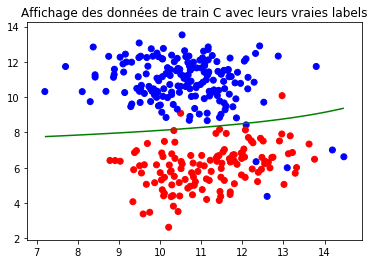

Taux de mal classés pour le set de test C :  0.03666666666666667


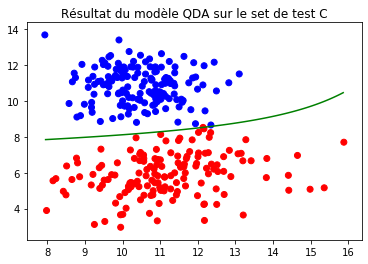

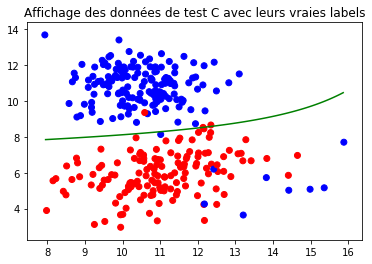

In [17]:
thetaC, mu1C, mu0C, sigma1C, sigma0C, QC, betaC, gammaC = train_qda(dataframe3)

print("Paramètres appris sur le set de train C : ")
print("theta_C : ", thetaC)
print("mu1_C : ", mu1C)
print("mu0_C : ", mu0C)
print("sigma1_C : ", sigma1C)
print("sigma0_C : ", sigma0C)
print("Q_C : ", QC)
print("beta_C : ", betaC)
print("gamma_C : ", gammaC)

Y_pred_trainC, misclass_trainC = test_qda(dataframe3, QC, betaC, gammaC)

Y_pred_testC, misclass_testC = test_qda(dataframe_testC, QC, betaC, gammaC)

print("Taux de mal classés pour le set de train C : ", misclass_trainC)

boundary_X_trainC, boundary_Y_trainC, hyperplan_trainC = hyperplan_qda(dataframe3, QC, betaC, gammaC)

plt.contour(boundary_X_trainC, boundary_Y_trainC, hyperplan_trainC, [0], colors ="g")
plt.scatter(dataframe3[0], dataframe3[1], c = colormap[Y_pred_trainC])
plt.title("Résultat du modèle QDA sur le set de train C")
plt.show()

plt.contour(boundary_X_trainC, boundary_Y_trainC, hyperplan_trainC, [0], colors ="g")
plt.scatter(dataframe3[0], dataframe3[1], c = colormap[dataframe3[2]])
plt.title("Affichage des données de train C avec leurs vraies labels")
plt.show()

print("Taux de mal classés pour le set de test C : ", misclass_testC)

boundary_X_testC, boundary_Y_testC, hyperplan_testC = hyperplan_qda(dataframe_testC, QC, betaC, gammaC)

plt.contour(boundary_X_testC, boundary_Y_testC, hyperplan_testC, [0], colors ="g")
plt.scatter(dataframe_testC[0], dataframe_testC[1], c = colormap[Y_pred_testC])
plt.title("Résultat du modèle QDA sur le set de test C")
plt.show()

plt.contour(boundary_X_testC, boundary_Y_testC, hyperplan_testC, [0], colors ="g")
plt.scatter(dataframe_testC[0], dataframe_testC[1], c = colormap[dataframe_testC[2]])
plt.title("Affichage des données de test C avec leurs vraies labels")
plt.show()

## Partie Regression Linéaire

In [18]:
n =np.array(dataframe1)
X = dataframe1.loc[:,0:1]
Y = dataframe1.loc[:, 2]

### ajout colonne de 1
X.loc[:, 2] = 1
### transformation en matrice
X = np.array(X)
Y = np.array(Y)
w = np.dot(np.dot(lng.inv(np.dot(X.T, X)), X.T), Y)

print(w.shape)
print(X[:,2])

(3,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


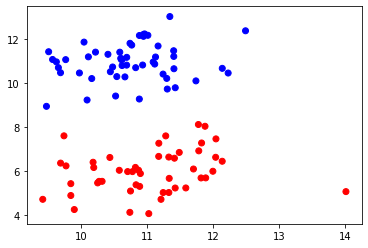

In [19]:
colormap = np.array(['blue', 'red'])
plt.scatter(dataframe1[0], dataframe1[1], c = colormap[dataframe1[2]])

In [20]:
### calcul sigma² pour trouver la droite de separation
sigma_square = 0
for i in range(0, len(Y)):
    sigma_square = sigma_square + (Y[i] - np.dot(X[i][:], w.T))**2
sigma_square = sigma_square/len(Y)  
print(sigma_square)


0.027650277808098776


In [21]:
### droite de spération des données
from math import log, pi, sqrt
def droite(x, w):
    droit = (-w[0]*x - w[2])/w[1]
    return droit


In [22]:
res = []
for i in range(0, len(Y)):
    res.append(droite(dataframe1.loc[i, 0], w))
    

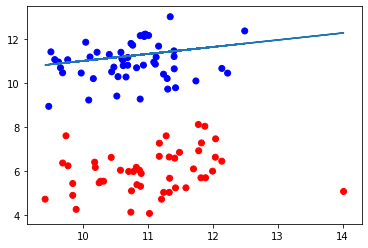

In [23]:
#plt.plot(dataframe1.loc[:, 0], res)
plt.plot(dataframe1.loc[:, 0], res)
plt.scatter(dataframe1[0], dataframe1[1], c = colormap[dataframe1[2]])

In [24]:
def train_linear(dataframe):
    X = dataframe.loc[:, [0, 1]]
    X.loc[:, 2] = 1
    Y = dataframe.loc[:, 2]
    X = np.array(X)
    Y = np.array(Y)
    w = np.dot(np.dot(lng.inv(np.dot(X.T, X)), X.T), Y)
    sigma_square = 0
    for i in range(0, len(Y)):
        sigma_square = sigma_square + (Y[i] - np.dot(X[i][:], w.T))**2
    sigma_square = sigma_square/len(Y) 
    Y_pred = []
    for i in range(len(Y)):
        if np.dot(w,X[i])>0:
            Y_pred.append(1)
        else:
            Y_pred.append(0)
    misclass = sum(Y!=Y_pred)/X.shape[0]
    return w, sigma_square

def test_linear(dataframe, w):
    X = dataframe.loc[:, [0, 1]]
    X.loc[:, 2] = 1
    Y = dataframe.loc[:, 2]
    X = np.array(X)
    Y = np.array(Y)
    Y_pred = []
    for i in range(len(Y)):
        if np.dot(w,X[i])>0:
            Y_pred.append(1)
        else:
            Y_pred.append(0)
    misclass = sum(Y!=Y_pred)/X.shape[0]
    return Y_pred, misclass

def hyperplan_linear(dataframe, w):
    X = dataframe.loc[:, [0, 1]]
    X.loc[:, 2] = 1
    X = np.array(X)
    res = []
    for i in range(X.shape[0]):
        res.append(droite(dataframe.loc[i, 0], w))
    return res
        

Paramètres appris sur le set de train A : 
w_A :  [ 0.05582438 -0.17636636  1.38345774]
sigma_square_A :  0.027650277808098776
Taux de mal classés pour le set de train A :  0.32


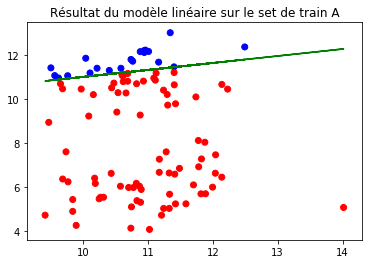

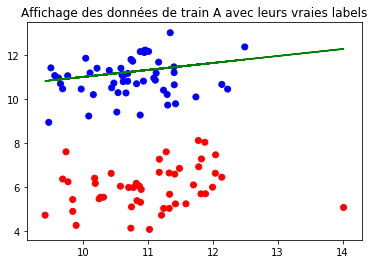

Taux de mal classés pour le set de test A :  0.3


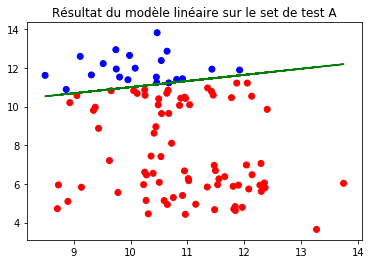

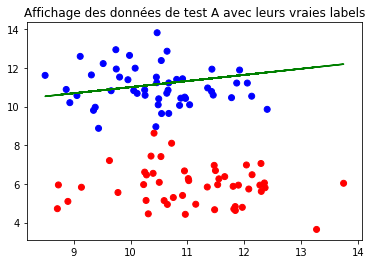

In [25]:
wA, sigma_squareA = train_linear(dataframe1)

print("Paramètres appris sur le set de train A : ")
print("w_A : ", wA)
print("sigma_square_A : ", sigma_squareA)

Y_pred_train_linA, misclass_train_linA = test_linear(dataframe1, wA)

print("Taux de mal classés pour le set de train A : ", misclass_train_linA)

plt.plot(dataframe1.loc[:, 0], hyperplan_linear(dataframe1, wA), "g")
plt.scatter(dataframe1[0], dataframe1[1], c = colormap[Y_pred_train_linA])
plt.title("Résultat du modèle linéaire sur le set de train A")
plt.show()

plt.plot(dataframe1.loc[:, 0], hyperplan_linear(dataframe1, wA), "g")
plt.scatter(dataframe1[0], dataframe1[1], c = colormap[dataframe1[2]])
plt.title("Affichage des données de train A avec leurs vraies labels")
plt.show()

Y_pred_test_linA, misclass_test_linA = test_linear(dataframe_testA, wA)

print("Taux de mal classés pour le set de test A : ", misclass_test_linA)

plt.plot(dataframe_testA.loc[:, 0], hyperplan_linear(dataframe_testA, wA), "g")
plt.scatter(dataframe_testA[0], dataframe_testA[1], c = colormap[Y_pred_test_linA])
plt.title("Résultat du modèle linéaire sur le set de test A")
plt.show()

plt.plot(dataframe_testA.loc[:, 0], hyperplan_linear(dataframe_testA, wA), "g")
plt.scatter(dataframe_testA[0], dataframe_testA[1], c = colormap[dataframe_testA[2]])
plt.title("Affichage des données de test A avec leurs vraies labels")
plt.show()

Paramètres appris sur le set de train B : 
w_B :  [ 0.08258172 -0.14757517  0.88249984]
sigma_square_B :  0.04849256882130192
Taux de mal classés pour le set de train B :  0.325


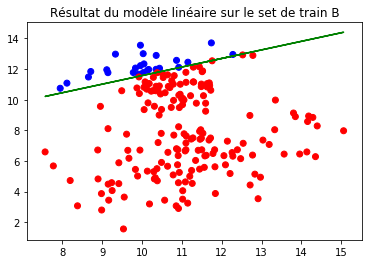

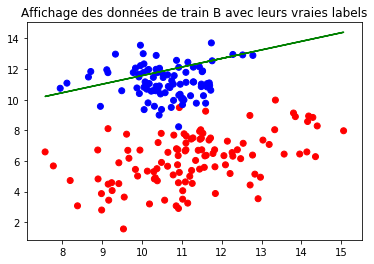

Taux de mal classés pour le set de test B :  0.36


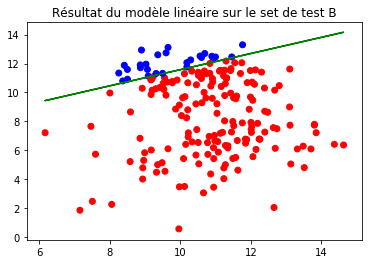

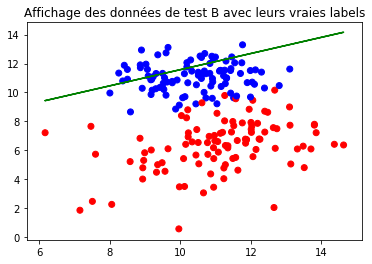

In [26]:
wB, sigma_squareB = train_linear(dataframe2)

print("Paramètres appris sur le set de train B : ")
print("w_B : ", wB)
print("sigma_square_B : ", sigma_squareB)

Y_pred_train_linB, misclass_train_linB = test_linear(dataframe2, wB)

print("Taux de mal classés pour le set de train B : ", misclass_train_linB)

plt.plot(dataframe2.loc[:, 0], hyperplan_linear(dataframe2, wB), "g")
plt.scatter(dataframe2[0], dataframe2[1], c = colormap[Y_pred_train_linB])
plt.title("Résultat du modèle linéaire sur le set de train B")
plt.show()

plt.plot(dataframe2.loc[:, 0], hyperplan_linear(dataframe2, wB), "g")
plt.scatter(dataframe2[0], dataframe2[1], c = colormap[dataframe2[2]])
plt.title("Affichage des données de train B avec leurs vraies labels")
plt.show()

Y_pred_test_linB, misclass_test_linB = test_linear(dataframe_testB, wB)

print("Taux de mal classés pour le set de test B : ", misclass_test_linB)

plt.plot(dataframe_testB.loc[:, 0], hyperplan_linear(dataframe_testB, wB), "g")
plt.scatter(dataframe_testB[0], dataframe_testB[1], c = colormap[Y_pred_test_linB])
plt.title("Résultat du modèle linéaire sur le set de test B")
plt.show()

plt.plot(dataframe_testB.loc[:, 0], hyperplan_linear(dataframe_testB, wB), "g")
plt.scatter(dataframe_testB[0], dataframe_testB[1], c = colormap[dataframe_testB[2]])
plt.title("Affichage des données de test B avec leurs vraies labels")
plt.show()

Paramètres appris sur le set de train C : 
w_C :  [ 0.01675461 -0.15897174  1.64015206]
sigma_square_C :  0.0554331088067433
Taux de mal classés pour le set de train C :  0.38333333333333336


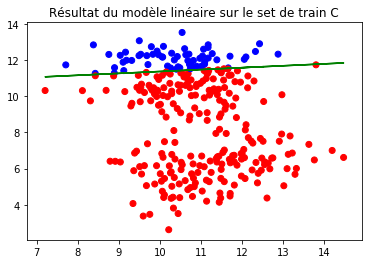

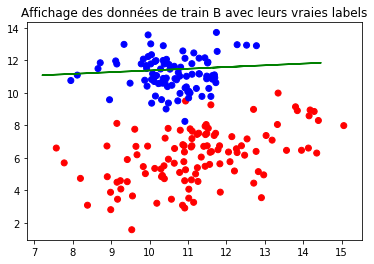

Taux de mal classés pour le set de test C :  0.36666666666666664


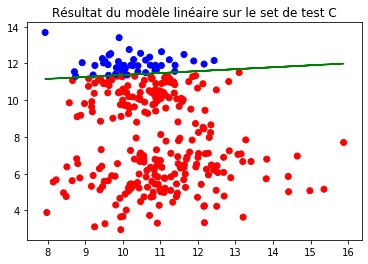

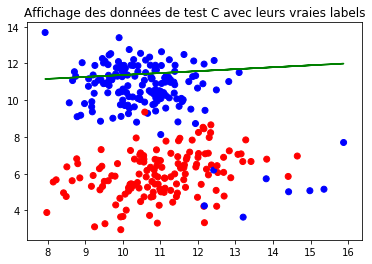

In [27]:
wC, sigma_squareC = train_linear(dataframe3)

print("Paramètres appris sur le set de train C : ")
print("w_C : ", wC)
print("sigma_square_C : ", sigma_squareC)

Y_pred_train_linC, misclass_train_linC = test_linear(dataframe3, wC)

print("Taux de mal classés pour le set de train C : ", misclass_train_linC)

plt.plot(dataframe3.loc[:, 0], hyperplan_linear(dataframe3, wC), "g")
plt.scatter(dataframe3[0], dataframe3[1], c = colormap[Y_pred_train_linC])
plt.title("Résultat du modèle linéaire sur le set de train C")
plt.show()

plt.plot(dataframe3.loc[:, 0], hyperplan_linear(dataframe3, wC), "g")
plt.scatter(dataframe2[0], dataframe2[1], c = colormap[dataframe2[2]])
plt.title("Affichage des données de train B avec leurs vraies labels")
plt.show()

Y_pred_test_linC, misclass_test_linC = test_linear(dataframe_testC, wC)

print("Taux de mal classés pour le set de test C : ", misclass_test_linC)

plt.plot(dataframe_testC.loc[:, 0], hyperplan_linear(dataframe_testC, wC), "g")
plt.scatter(dataframe_testC[0], dataframe_testC[1], c = colormap[Y_pred_test_linC])
plt.title("Résultat du modèle linéaire sur le set de test C")
plt.show()

plt.plot(dataframe_testC.loc[:, 0], hyperplan_linear(dataframe_testC, wC), "g")
plt.scatter(dataframe_testC[0], dataframe_testC[1], c = colormap[dataframe_testC[2]])
plt.title("Affichage des données de test C avec leurs vraies labels")
plt.show()

## partie regression logit, la constante est supposée déjà prise en compte dans la matrice X

In [28]:
X = dataframe1.loc[:, [0, 1]]
Y = dataframe1.loc[:, 2]
X.loc[:, 2] = 1
X = np.array(X)
w = np.array([0.5, 0.5, 0.5])
def eta_i(w, x_i):
    prod = np.vdot(w, x_i)
    return sigmoid(prod)   

In [29]:
def eta(w, X):
    et = np.zeros(X[:, 0].shape)
    for i in range(0, len(X[:, 0])):
        et[i] = eta_i(w, X[i, :])
    return np.diag(et)

In [30]:
def gradient(X, Y, w):
    grad = np.zeros(X[1, :].shape)
    for i in range(0, len(Y)):
        grad = grad + X[i, :]*(Y[i] - eta_i(w, X[i, :]))
    return grad

In [31]:
def hessian(X, Y, w):
    return X.T@eta(w, X)@X

In [32]:
def log_likelihood(X, Y, w):
    log_like = 0
    for i in range(0, len(Y)):
        log_like = log_like + Y[i]*np.log(sigmoid(w.T@X[i, :])) + (1 - Y[i])*np.log(sigmoid(-w.T@X[i, :]))
    return log_like
print(log_likelihood(X, Y, np.array([1, 1, 1])))

-1178.9607589241702


In [33]:
def gradient_descent(X, Y, eps):
    w = np.random.rand(3)
    w_ancien = w
    w = w +lng.inv(hessian(X, Y, w_ancien))@gradient(X, Y, w_ancien)
    while(abs(lng.norm(w - w_ancien))> eps):
        w_ancien = w
        w = w +lng.inv(hessian(X, Y, w_ancien))@gradient(X, Y, w_ancien)
    return w


In [34]:
def train_reg_log(dataframe):
    X = dataframe.loc[:, [0, 1]]
    X.loc[:, 2] = 1
    Y = dataframe.loc[:, 2]
    X = np.array(X)
    Y = np.array(Y)
    w_reg = gradient_descent(X, Y, 0.001)
    return w_reg

In [35]:
w_reg = gradient_descent(X, Y, 0.001)
print(w_reg)

[ 1.80912254 -5.99238576 31.54917271]


In [36]:
def hyperplan_log(dataframe, w):
    X = dataframe.loc[:, [0, 1]]
    X.loc[:, 2] = 1
    X = np.array(X)
    res = []
    for i in range(X.shape[0]):
        res.append((w[2] - w[0]*X[i, 0])/w[1])
    return res


In [37]:
def proba(X, w):
    prob_tot = []
    for i in range(0, len(X[:, 0])):
        prob_tot.append(sigmoid(w@X[i, :].T))
    return np.array(prob_tot)

def pred(X, w):
    prob_tot = proba(X, w)
    Y_pred = []
    for i in range(0, len(prob_tot)):
        if prob_tot[i]> 1/2:
            Y_pred.append(1)
        else :
            Y_pred.append(0)
    return Y_pred

def ratio(Y, X, w):
    Y_pred = pred(X, w)
    positive = 0
    negative = 0
    for i in range(0, len(Y)):
        if Y_pred[i] == Y[i]:
            positive = positive +1
        else:
            negative = negative + 1
    return positive/(positive + negative)

In [38]:
def test_reg_log(dataframe_test, w_train):
    X_test = dataframe_test.loc[:, [0, 1]]
    X_test.loc[:, 2] = 1
    X_test = np.array(X_test)
    Y_pred_test = pred(X, w_train)
    Y = np.array(dataframe_test.loc[:, 2])
    #rate = ratio(Y, X, w_train)
    misclass = sum(Y!=Y_pred_test)/X.shape[0]
    return Y_pred_test, misclass

In [39]:
Y_pred, rate = test_reg_log(dataframe_testA, w_reg)

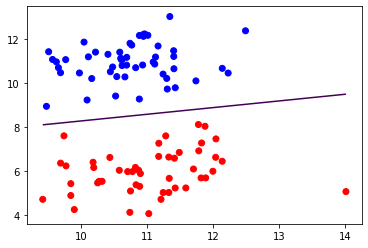

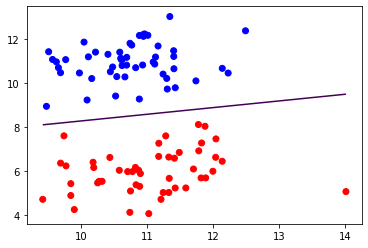

In [40]:
## dessin pour le train A
trainA = dataframe1.loc[:, [0, 1]]
trainA.loc[:, 2] = 1
trainA = np.array(trainA)
w_reg = train_reg_log(dataframe1)
y_pred_train_A = pred(trainA, w_reg)

plt.scatter(trainA[:,0], trainA[:, 1], c = colormap[y_pred_train_A])
x_lim = np.max(abs(trainA[:, 0]))
x_min = np.min(abs(trainA[:, 0]))
y_lim = np.max(abs(trainA[:, 1]))
y_min = np.min(abs(trainA[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

plt.scatter(trainA[:,0], trainA[:, 1], c = colormap[dataframe1[2]])
x_lim = np.max(abs(trainA[:, 0]))
x_min = np.min(abs(trainA[:, 0]))
y_lim = np.max(abs(trainA[:, 1]))
y_min = np.min(abs(trainA[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

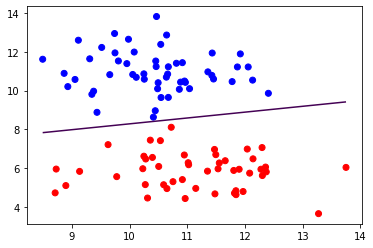

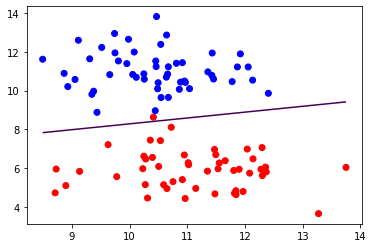

In [41]:
## dessin pour le test A
testA = dataframe_testA.loc[:, [0, 1]]
testA.loc[:, 2] = 1
testA = np.array(testA)
w_reg = train_reg_log(dataframe1)
y_pred_test_A = pred(testA, w_reg)

plt.scatter(testA[:,0], testA[:, 1], c = colormap[y_pred_test_A])
x_lim = np.max(abs(testA[:, 0]))
x_min = np.min(abs(testA[:, 0]))
y_lim = np.max(abs(testA[:, 1]))
y_min = np.min(abs(testA[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

plt.scatter(testA[:,0], testA[:, 1], c = colormap[dataframe_testA[2]])
x_lim = np.max(abs(testA[:, 0]))
x_min = np.min(abs(testA[:, 0]))
y_lim = np.max(abs(testA[:, 1]))
y_min = np.min(abs(testA[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

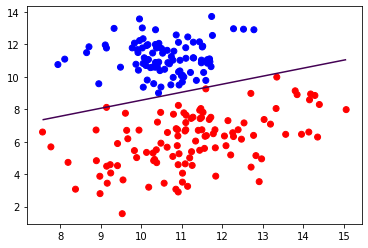

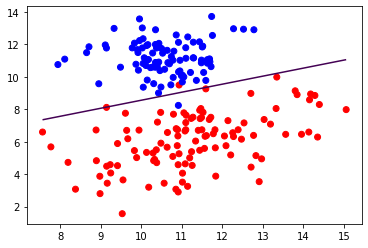

In [42]:
## dessin pour le train B
trainB = dataframe2.loc[:, [0, 1]]
trainB.loc[:, 2] = 1
trainB= np.array(trainB)
w_reg = train_reg_log(dataframe2)
y_pred_train_B = pred(trainB, w_reg)

plt.scatter(trainB[:,0], trainB[:, 1], c = colormap[y_pred_train_B])
x_lim = np.max(abs(trainB[:, 0]))
x_min = np.min(abs(trainB[:, 0]))
y_lim = np.max(abs(trainB[:, 1]))
y_min = np.min(abs(trainB[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

plt.scatter(trainB[:,0], trainB[:, 1], c = colormap[dataframe2[2]])
x_lim = np.max(abs(trainB[:, 0]))
x_min = np.min(abs(trainB[:, 0]))
y_lim = np.max(abs(trainB[:, 1]))
y_min = np.min(abs(trainB[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

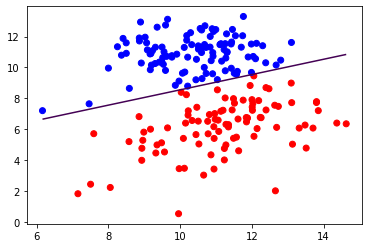

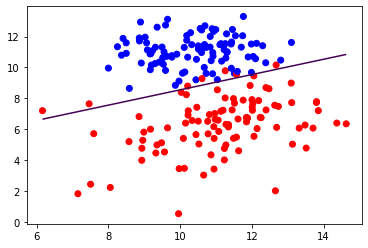

In [43]:
## dessin pour le test B
testB = dataframe_testB.loc[:, [0, 1]]
testB.loc[:, 2] = 1
testB = np.array(testB)
w_reg = train_reg_log(dataframe2)
y_pred_test_B = pred(testB, w_reg)

plt.scatter(testB[:,0], testB[:, 1], c = colormap[y_pred_test_B])
x_lim = np.max(abs(testB[:, 0]))
x_min = np.min(abs(testB[:, 0]))
y_lim = np.max(abs(testB[:, 1]))
y_min = np.min(abs(testB[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

plt.scatter(testB[:,0], testB[:, 1], c = colormap[dataframe_testB[2]])
x_lim = np.max(abs(testB[:, 0]))
x_min = np.min(abs(testB[:, 0]))
y_lim = np.max(abs(testB[:, 1]))
y_min = np.min(abs(testB[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

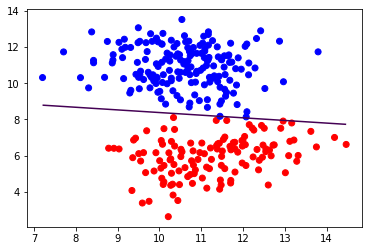

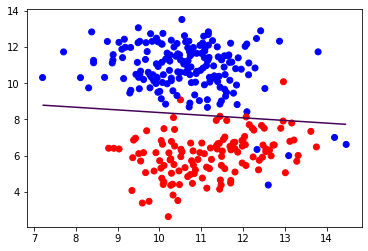

In [44]:
## dessin pour le train C
trainC = dataframe3.loc[:, [0, 1]]
trainC.loc[:, 2] = 1
trainC= np.array(trainC)
w_reg = train_reg_log(dataframe3)
y_pred_train_C = pred(trainC, w_reg)

plt.scatter(trainC[:,0], trainC[:, 1], c = colormap[y_pred_train_C])
x_lim = np.max(abs(trainC[:, 0]))
x_min = np.min(abs(trainC[:, 0]))
y_lim = np.max(abs(trainC[:, 1]))
y_min = np.min(abs(trainC[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

plt.scatter(trainC[:,0], trainC[:, 1], c = colormap[dataframe3[2]])
x_lim = np.max(abs(trainC[:, 0]))
x_min = np.min(abs(trainC[:, 0]))
y_lim = np.max(abs(trainC[:, 1]))
y_min = np.min(abs(trainC[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

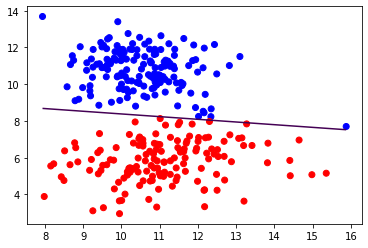

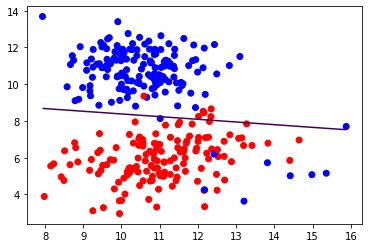

In [45]:
## dessin pour le test C
testC = dataframe_testC.loc[:, [0, 1]]
testC.loc[:, 2] = 1
testC = np.array(testC)
w_reg = train_reg_log(dataframe3)
y_pred_test_C = pred(testC, w_reg)

plt.scatter(testC[:,0], testC[:, 1], c = colormap[y_pred_test_C])
x_lim = np.max(abs(testC[:, 0]))
x_min = np.min(abs(testC[:, 0]))
y_lim = np.max(abs(testC[:, 1]))
y_min = np.min(abs(testC[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

plt.scatter(testC[:,0], testC[:, 1], c = colormap[dataframe_testC[2]])
x_lim = np.max(abs(testC[:, 0]))
x_min = np.min(abs(testC[:, 0]))
y_lim = np.max(abs(testC[:, 1]))
y_min = np.min(abs(testC[:, 1]))
u = np.linspace(x_min, x_lim, 400)
v = np.linspace(y_min, y_lim, 400)
u, v = np.meshgrid(u, v)
plt.contour(u, v, w_reg[0]*u + w_reg[1]*v + w_reg[2], [0])
plt.show()

In [46]:
w_reg_A = train_reg_log(dataframe1)
w_reg_B = train_reg_log(dataframe2)
w_reg_C = train_reg_log(dataframe3)

In [47]:
test_A = dataframe_testA
test_B = dataframe_testB
test_C = dataframe_testC

test_A_X = test_A.loc[:, [0, 1]]
test_B_X = test_B.loc[:, [0, 1]]
test_C_X = test_C.loc[:, [0, 1]]

test_A_Y = test_A.loc[:, 2]
test_B_Y = test_B.loc[:, 2]
test_C_Y = test_C.loc[:, 2]

test_A_X.loc[:, 2] = 1
test_B_X.loc[:, 2] = 1
test_C_X.loc[:, 2] = 1

test_A_X = np.array(test_A_X)
test_B_X = np.array(test_B_X)
test_C_X = np.array(test_C_X)

test_A_Y = np.array(test_A_Y)
test_B_Y = np.array(test_B_Y)
test_C_Y = np.array(test_C_Y)


Y_pred_A = []
for i in range(0, len(test_A_X[:, 0])):
    Y_pred_A.append(sigmoid(test_A_X[i, :]@w_reg_A.T))
    if Y_pred_A[i]>1/2:
        Y_pred_A[i] = 1
    else:
        Y_pred_A[i] = 0
Y_pred_B = []
for i in range(0, len(test_B_X[:, 0])):
    Y_pred_B.append(sigmoid(test_B_X[i, :]@w_reg_B.T))
    if Y_pred_B[i]>1/2:
        Y_pred_B[i] = 1
    else:
        Y_pred_B[i] = 0
        
Y_pred_C = []
for i in range(0, len(test_C_X[:, 0])):
    Y_pred_C.append(sigmoid(test_C_X[i, :]@w_reg_C.T))
    if Y_pred_C[i]>1/2:
        Y_pred_C[i] = 1
    else:
        Y_pred_C[i] = 0

misclass_A = [ 1 if Y_pred_A[i] != test_A_Y[i] else 0 for i in range(0, len(Y_pred_A))]
misclass_B = [ 1 if Y_pred_B[i] != test_B_Y[i] else 0 for i in range(0, len(Y_pred_B))]
misclass_C = [ 1 if Y_pred_C[i] != test_C_Y[i] else 0 for i in range(0, len(Y_pred_C))]

In [48]:
train_A_X = dataframe1.loc[:, [0, 1]]
train_B_X = dataframe2.loc[:, [0, 1]]
train_C_X = dataframe3.loc[:, [0, 1]]

train_A_Y = dataframe1.loc[:, 2]
train_B_Y = dataframe2.loc[:, 2]
train_C_Y = dataframe3.loc[:, 2]

train_A_X.loc[:, 2] = 1
train_B_X.loc[:, 2] = 1
train_C_X.loc[:, 2] = 1

train_A_X = np.array(train_A_X)
train_B_X = np.array(train_B_X)
train_C_X = np.array(train_C_X)

train_A_Y = np.array(train_A_Y)
train_B_Y = np.array(train_B_Y)
train_C_Y = np.array(train_C_Y)


Y_pred_A_train = []
for i in range(0, len(train_A_X[:, 0])):
    Y_pred_A_train.append(sigmoid(train_A_X[i, :]@w_reg_A.T))
    if Y_pred_A_train[i]>1/2:
        Y_pred_A_train[i] = 1
    else:
        Y_pred_A_train[i] = 0
Y_pred_B_train = []
for i in range(0, len(train_B_X[:, 0])):
    Y_pred_B_train.append(sigmoid(train_B_X[i, :]@w_reg_B.T))
    if Y_pred_B_train[i]>1/2:
        Y_pred_B_train[i] = 1
    else:
        Y_pred_B_train[i] = 0
        
Y_pred_C_train = []
for i in range(0, len(train_C_X[:, 0])):
    Y_pred_C_train.append(sigmoid(train_C_X[i, :]@w_reg_C.T))
    if Y_pred_C_train[i]>1/2:
        Y_pred_C_train[i] = 1
    else:
        Y_pred_C_train[i] = 0

misclass_A_train = [ 1 if Y_pred_A_train[i] != train_A_Y[i] else 0 for i in range(0, len(Y_pred_A_train))]
misclass_B_train = [ 1 if Y_pred_B_train[i] != train_B_Y[i] else 0 for i in range(0, len(Y_pred_B_train))]
misclass_C_train = [ 1 if Y_pred_C_train[i] != train_C_Y[i] else 0 for i in range(0, len(Y_pred_C_train))]

In [49]:
misclass_A = sum(np.array(misclass_A))/len(np.array((misclass_A)))
misclass_B = sum(np.array(misclass_B))/len(np.array(misclass_B))
misclass_C = sum(np.array(misclass_C))/len(np.array(misclass_C))
tab = pd.DataFrame(index = [1], columns = ['rate A', 'rate B', 'rate C'])

In [50]:
misclass_A_train = sum(np.array(misclass_A_train))/len(np.array((misclass_A_train)))
misclass_B_train = sum(np.array(misclass_B_train))/len(np.array(misclass_B_train))
misclass_C_train = sum(np.array(misclass_C_train))/len(np.array(misclass_C_train))

In [51]:
tab = pd.DataFrame(index = ['test', 'train'], columns = ['rate A', 'rate B', 'rate C'])
tab.loc['test', 'rate A'] = misclass_A
tab.loc['test', 'rate B'] = misclass_B
tab.loc['test', 'rate C'] = misclass_C
tab.loc['train', 'rate A'] = misclass_A_train
tab.loc['train', 'rate B'] = misclass_B_train
tab.loc['train', 'rate C'] = misclass_C_train
tab

,rate A,rate B,rate C
test,0.01,0.035,0.0466667
train,0,0.01,0.03


# Code Generative Model